In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [ ]:
transaction_bh =pd.read_csv("QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [15]:
transaction_bh

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [18]:
print(transaction_bh.dtypes)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [20]:
print(transaction_bh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [22]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [26]:
print(transaction_data.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [24]:
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


In [28]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [30]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [32]:
unique_count = transaction_data['PROD_NAME'].unique()

In [36]:
print(unique_count)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [78]:
transaction_data['PROD_NAME_CLEANED'] = transaction_data['PROD_NAME'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [80]:
transaction_data['PROD_NAME_CLEANED'] = transaction_data['PROD_NAME'].str.replace(r'\d+g\b', '', regex=True)

In [84]:
transaction_data.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,Tostitos Splash Of Lime


In [64]:
words = transaction_data['PROD_NAME_CLEANED'].str.split().explode()

In [70]:
word_counts = Counter(words)

In [72]:
sorted_word_counts = word_counts.most_common()

In [74]:
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

Chips: 49770
Kettle: 41288
&: 35565
Smiths: 28860
Salt: 27976
Cheese: 27890
Pringles: 25102
Doritos: 24962
Crinkle: 23960
Corn: 22063
Original: 21560
Cut: 20754
Chip: 18645
Chicken: 18577
Salsa: 18094
Sea: 14145
Thins: 14075
Sour: 13882
Crisps: 12607
Vinegar: 12402
Chilli: 12389
RRD: 11894
Infuzions: 11057
Supreme: 10963
WW: 10320
Cobs: 9693
Popd: 9693
Tortilla: 9580
Tostitos: 9471
Twisties: 9454
Sensations: 9429
Old: 9324
El: 9324
Paso: 9324
Dip: 9324
Sweet: 7883
Lime: 7852
Tomato: 7669
Cream: 7618
Thinly: 7507
Tyrrells: 6442
And: 6373
BBQ: 6351
Tangy: 6332
Grain: 6272
Waves: 6272
Lightly: 6248
Salted: 6248
Soy: 6121
Natural: 6050
Mild: 6048
Red: 5885
Rock: 5885
Deli: 5885
Thai: 4737
Burger: 4733
Swt: 4718
Chives: 4687
Honey: 4661
Nacho: 4658
Potato: 4647
Cheezels: 4603
CCs: 4551
Woolworths: 4437
Mozzarella: 3304
Basil: 3304
Pesto: 3304
ChpsHny&Jlpno: 3296
Chili: 3296
Swt/Chlli: 3269
&Sr/Cream: 3269
Ched: 3268
Pot: 3257
Splash: 3252
Of: 3252
SweetChili: 3242
PotatoMix: 3242
Crnkle: 32

In [88]:
transaction_data = transaction_data[~transaction_data['PROD_NAME_CLEANED'].str.contains("salsa", case=False)]

In [90]:
transaction_data['NAME_LENGTH'] = transaction_data['PROD_NAME_CLEANED'].str.len()

In [92]:
summary_stats = transaction_data['NAME_LENGTH'].describe()

In [94]:
print(summary_stats)

count    246742.000000
mean         29.449972
std           6.202024
min          13.000000
25%          26.000000
50%          31.000000
75%          34.000000
max          40.000000
Name: NAME_LENGTH, dtype: float64


In [96]:
outlier_transactions = transaction_data[transaction_data['PROD_QTY'] == 200]

In [98]:
print(outlier_transactions)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0   
69763  Dorito Corn Chp     Supreme 380g       200      650.0   

                  PROD_NAME_CLEANED  NAME_LENGTH  
69762  Dorito Corn Chp     Supreme            28  
69763  Dorito Corn Chp     Supreme            28  


In [100]:
outlier_summary = outlier_transactions.describe()
print(outlier_summary)

                      DATE  STORE_NBR  LYLTY_CARD_NBR         TXN_ID  \
count                    2        2.0             2.0       2.000000   
mean   2019-01-03 00:00:00      226.0        226000.0  226205.500000   
min    2018-08-19 00:00:00      226.0        226000.0  226201.000000   
25%    2018-10-26 12:00:00      226.0        226000.0  226203.250000   
50%    2019-01-03 00:00:00      226.0        226000.0  226205.500000   
75%    2019-03-12 12:00:00      226.0        226000.0  226207.750000   
max    2019-05-20 00:00:00      226.0        226000.0  226210.000000   
std                    NaN        0.0             0.0       6.363961   

       PROD_NBR  PROD_QTY  TOT_SALES  NAME_LENGTH  
count       2.0       2.0        2.0          2.0  
mean        4.0     200.0      650.0         28.0  
min         4.0     200.0      650.0         28.0  
25%         4.0     200.0      650.0         28.0  
50%         4.0     200.0      650.0         28.0  
75%         4.0     200.0      650.0   

In [104]:
outlier_customer_id = outlier_transactions['LYLTY_CARD_NBR'].unique()

In [106]:
print(f"Customer ID(s) with 200 packets in a transaction: {outlier_customer_id}")

Customer ID(s) with 200 packets in a transaction: [226000]


In [108]:
customer_transactions = transaction_data[transaction_data['LYLTY_CARD_NBR'].isin(outlier_customer_id)]

In [110]:
print(customer_transactions)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0   
69763  Dorito Corn Chp     Supreme 380g       200      650.0   

                  PROD_NAME_CLEANED  NAME_LENGTH  
69762  Dorito Corn Chp     Supreme            28  
69763  Dorito Corn Chp     Supreme            28  


In [112]:
transactions_by_date = transaction_data.groupby('DATE').size()

In [114]:
transactions_by_date = transactions_by_date.reset_index(name='TRANSACTION_COUNT')

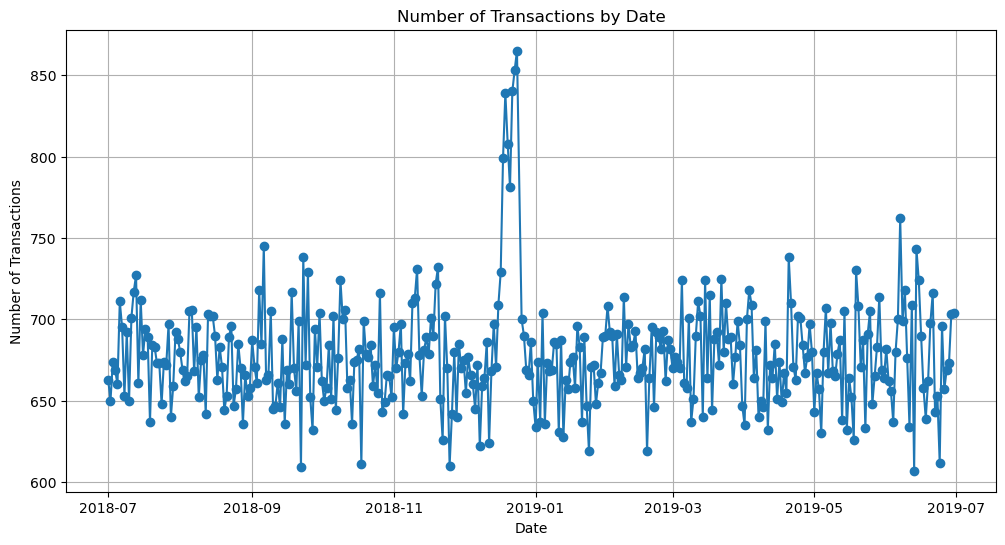

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date['DATE'], transactions_by_date['TRANSACTION_COUNT'], marker='o')
plt.title('Number of Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In [118]:
december_transactions = transaction_data[transaction_data['DATE'].dt.month == 12]

In [120]:
december_transactions_by_date = december_transactions.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT')

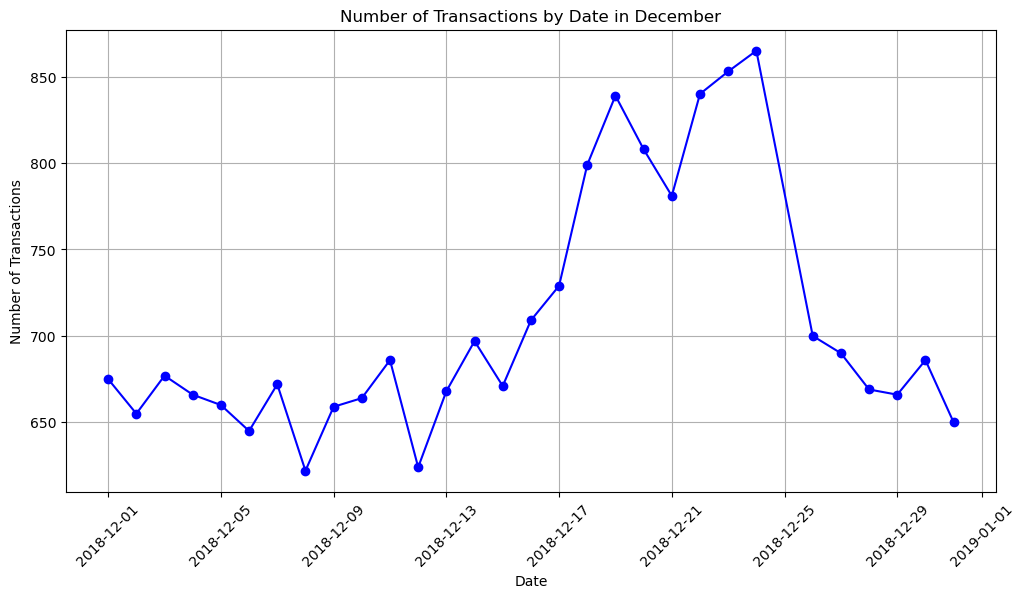

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(december_transactions_by_date['DATE'], december_transactions_by_date['TRANSACTION_COUNT'], marker='o', color='blue')
plt.title('Number of Transactions by Date in December')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [124]:
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(int)

In [130]:
transaction_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED,NAME_LENGTH,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,34,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,20,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,34,170


In [134]:
pack_size_summary = transaction_data['PACK_SIZE'].describe()
print(pack_size_summary)

count    246742.000000
mean        175.585178
std          59.434727
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64


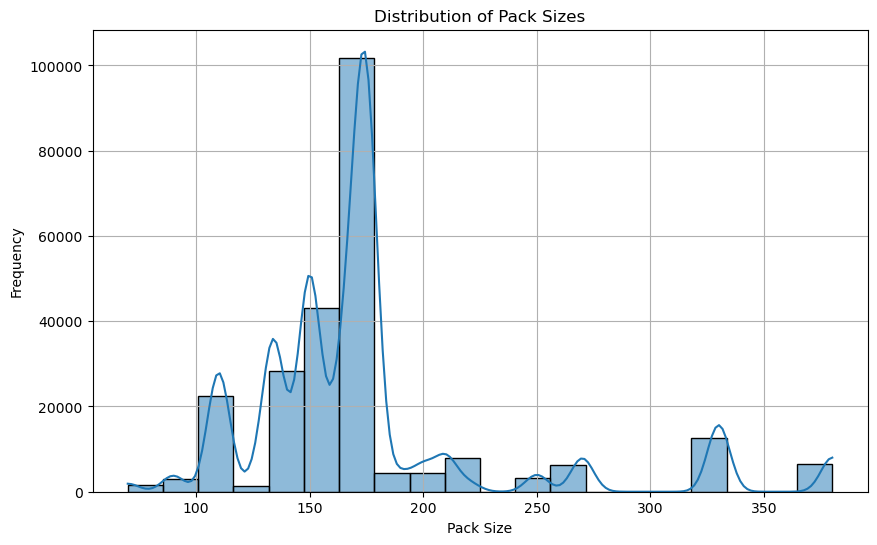

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['PACK_SIZE'], bins=20, kde=True)
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [138]:
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

In [140]:
print(transaction_data[['PROD_NAME', 'BRAND']].head())

                                  PROD_NAME    BRAND
0    Natural Chip        Compny SeaSalt175g  Natural
1                  CCs Nacho Cheese    175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle


In [142]:
transaction_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED,NAME_LENGTH,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSalt,34,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,20,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,34,170,Smiths


In [144]:
brand_mapping = {
    'RED': 'Red Rock Deli',
    'RRD': 'Red Rock Deli',
    'SMITH': 'Smiths',
    'NCC': 'Natural Chip Co'}

In [146]:
transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_mapping)

In [148]:
print(transaction_data[['PROD_NAME', 'BRAND']].head())

                                  PROD_NAME    BRAND
0    Natural Chip        Compny SeaSalt175g  Natural
1                  CCs Nacho Cheese    175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle


In [150]:
summary_stats = transaction_data.describe()
print("Summary Statistics for Numerical Columns:")
print(summary_stats)

Summary Statistics for Numerical Columns:
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  \
count  2.467420e+05  246742.000000  246742.000000  246742.000000   
mean   1.351311e+05      56.351789       1.908062       7.321322   
min    1.000000e+00       1.000000       1.000000       1.700000   
25%    6.756925e+04      26.000000       2.000

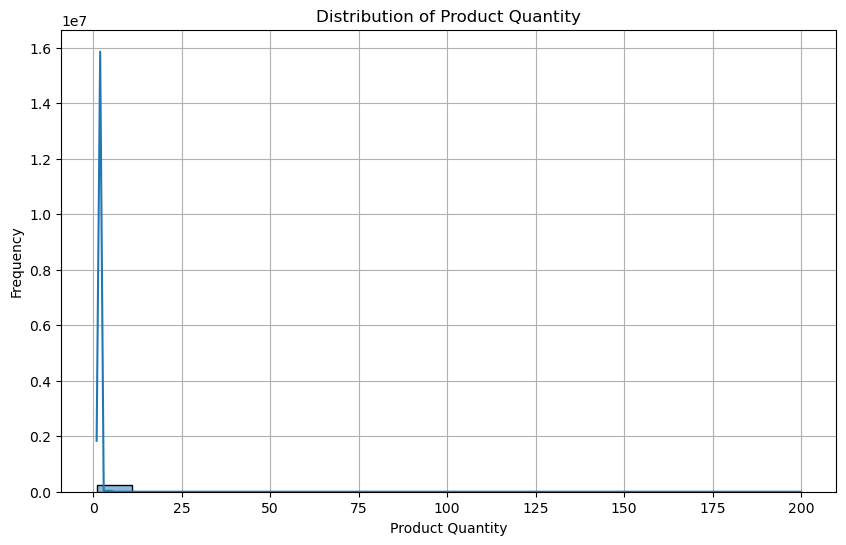

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['PROD_QTY'], bins=20, kde=True)
plt.title('Distribution of Product Quantity')
plt.xlabel('Product Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

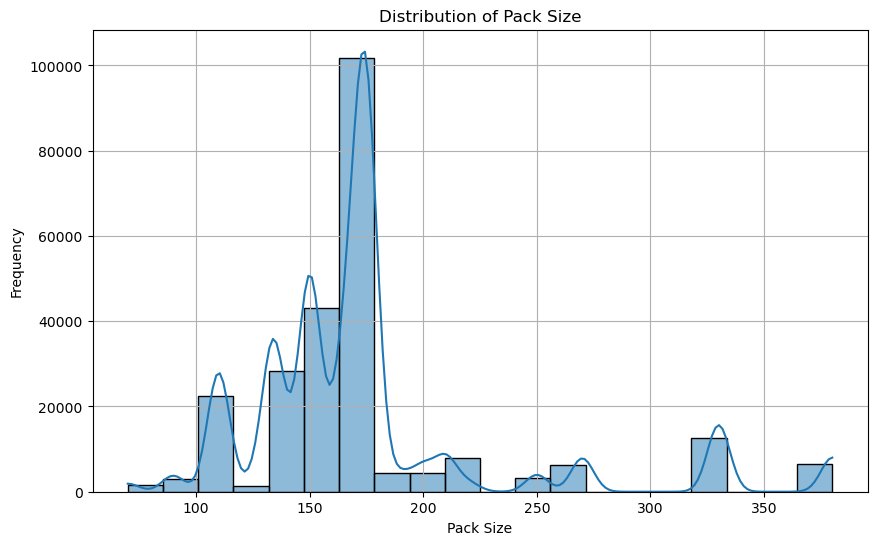

In [154]:
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['PACK_SIZE'], bins=20, kde=True)
plt.title('Distribution of Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [158]:
brand_counts = transaction_data['BRAND'].value_counts()
print("\nBrand Counts:")
print(brand_counts)


Brand Counts:
BRAND
Kettle             41288
Smiths             27390
Pringles           25102
Doritos            22041
Thins              14075
Red Rock Deli      11894
Infuzions          11057
WW                 10320
Cobs                9693
Tostitos            9471
Twisties            9454
Tyrrells            6442
Grain               6272
Natural             6050
Cheezels            4603
CCs                 4551
Red                 4427
Dorito              3185
Infzns              3144
Smith               2963
Cheetos             2927
Snbts               1576
Burger              1564
Woolworths          1516
GrnWves             1468
Sunbites            1432
Natural Chip Co     1419
French              1418
Name: count, dtype: int64


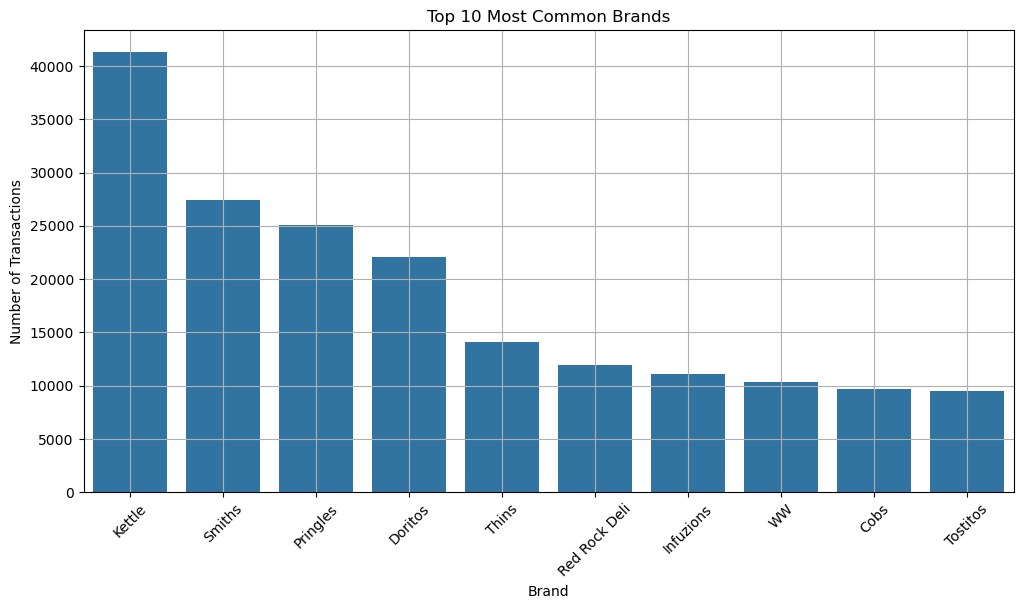

In [160]:
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.head(10).index, y=brand_counts.head(10).values)
plt.title('Top 10 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [167]:
merged_data = pd.merge(transaction_data, transaction_bh, on='LYLTY_CARD_NBR', how='inner')

In [171]:
merged_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [173]:
null_values_summary = merged_data.isnull().sum()
print("Summary of Null Values in the Merged DataFrame:")
print(null_values_summary)

Summary of Null Values in the Merged DataFrame:
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [175]:
merged_data.to_csv('merged_transaction_customer_data.csv', index=False)

In [177]:
## Data analysis on customer segments 

In [183]:
total_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

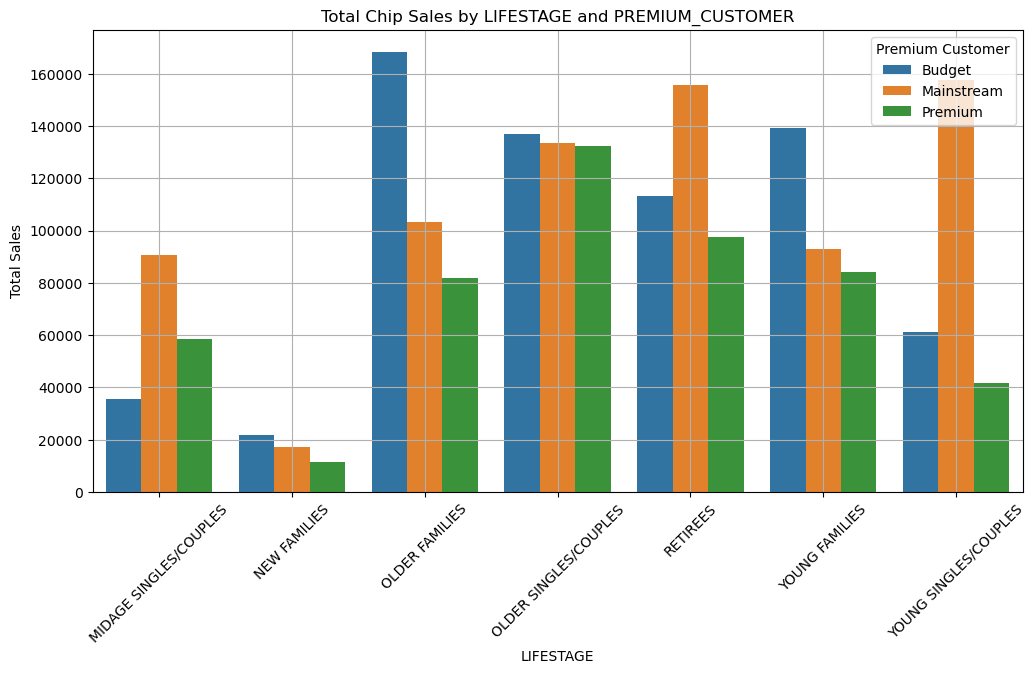

In [187]:
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=total_sales, errorbar=None)
plt.title('Total Chip Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.grid(True)
plt.show()

In [189]:
customer_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

In [191]:
customer_summary.rename(columns={'LYLTY_CARD_NBR': 'NUMBER_OF_CUSTOMERS'}, inplace=True)

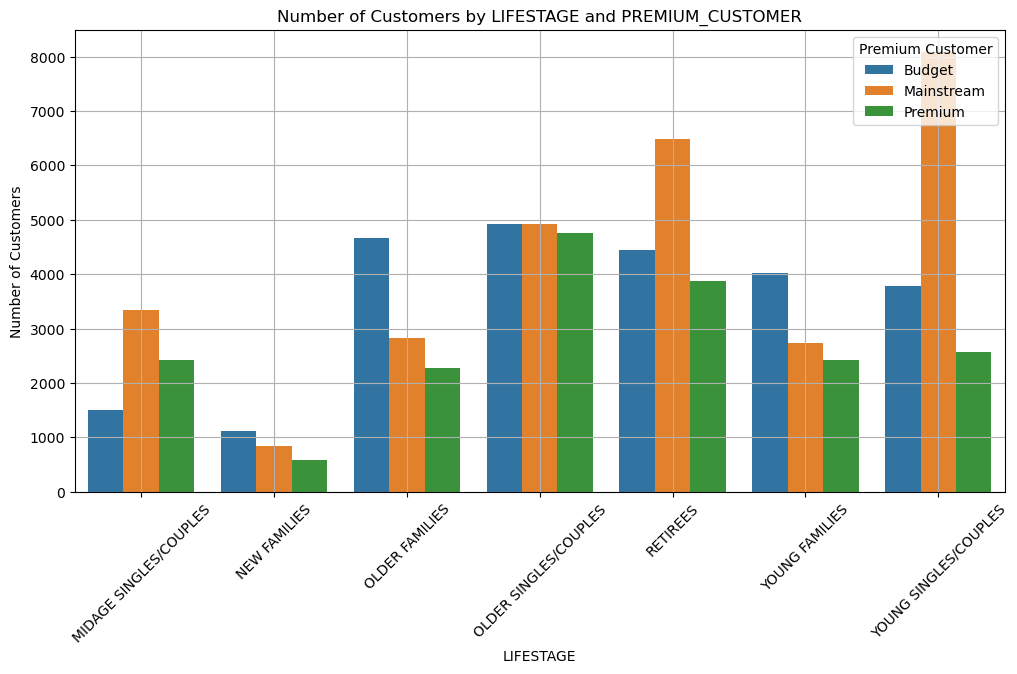

In [195]:
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='NUMBER_OF_CUSTOMERS', hue='PREMIUM_CUSTOMER', data=customer_summary, errorbar=None)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.grid(True)
plt.show()

In [197]:
total_units = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

In [199]:
customer_count = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

In [201]:
units_per_customer = pd.merge(total_units, customer_count, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

In [203]:
units_per_customer['AVG_UNITS_PER_CUSTOMER'] = units_per_customer['PROD_QTY'] / units_per_customer['LYLTY_CARD_NBR']

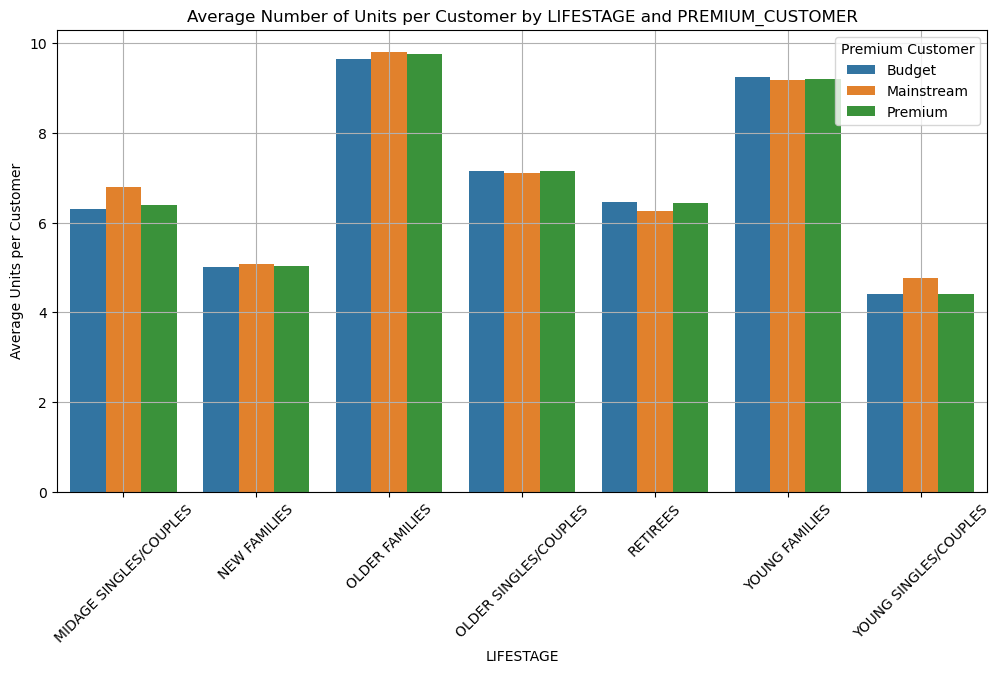

In [207]:
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='AVG_UNITS_PER_CUSTOMER', hue='PREMIUM_CUSTOMER', data=units_per_customer, errorbar=None)
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.grid(True)
plt.show()

In [213]:
merged_data['TOTAL_SALES'] = merged_data['PROD_QTY'] * merged_data['TOT_SALES']
total_sales_units = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOTAL_SALES': 'sum',
    'PROD_QTY': 'sum'
}).reset_index()

In [215]:
total_sales_units['AVG_PRICE_PER_UNIT'] = total_sales_units['TOTAL_SALES'] / total_sales_units['PROD_QTY']

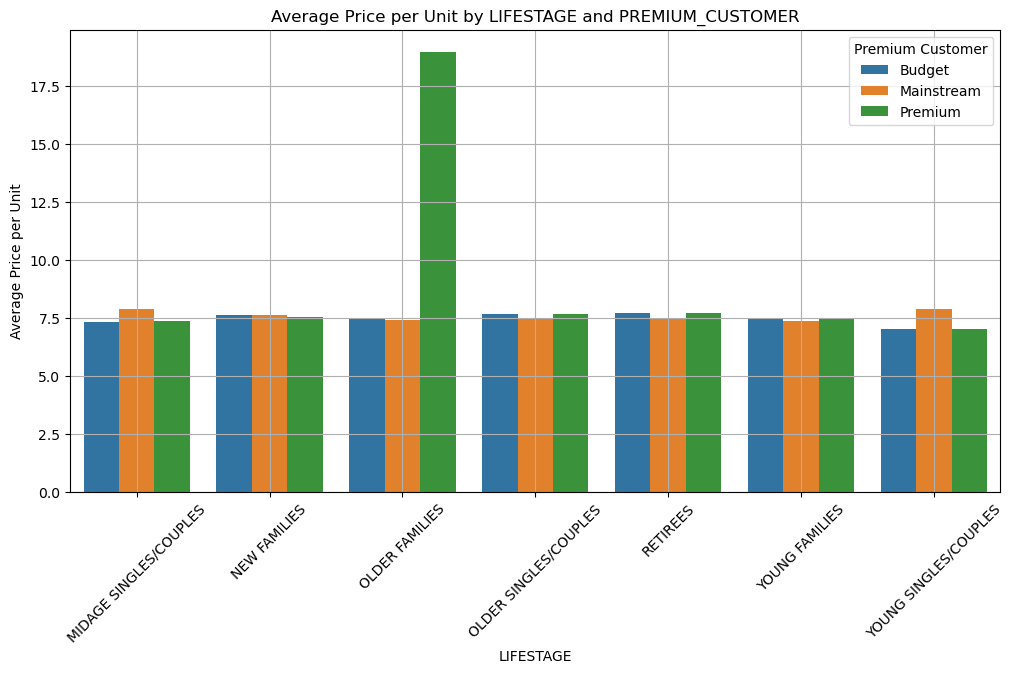

In [217]:
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER', data=total_sales_units, errorbar=None)
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.grid(True)
plt.show()

In [219]:
from scipy import stats

In [221]:
target_segments = merged_data[merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])]

In [223]:
mainstream_group = target_segments[target_segments['PREMIUM_CUSTOMER'] == 'Mainstream']['PROD_QTY']

In [225]:
premium_budget_group = target_segments[target_segments['PREMIUM_CUSTOMER'].isin(['Premium', 'Budget'])]['PROD_QTY']

In [227]:
t_stat, p_value = stats.ttest_ind(mainstream_group, premium_budget_group, equal_var=False)

In [229]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 9.691270577608579
P-value: 3.412542184174193e-22


In [ ]:
target_segment = merged_data[merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])]

In [ ]:
rest_of_population = merged_data[~merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])]

In [ ]:
avg_pack_size_target = target_segment['PACK_SIZE'].mean()
avg_pack_size_rest = rest_of_population['PACK_SIZE'].mean()

In [ ]:
print(f"Average Pack Size - Target Segment: {avg_pack_size_target}")
print(f"Average Pack Size - Rest of Population: {avg_pack_size_rest}")

In [ ]:
from scipy import stats

In [ ]:
t_stat, p_value = stats.ttest_ind(target_segment['PACK_SIZE'], rest_of_population['PACK_SIZE'], equal_var=False)

In [ ]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

In [ ]:
target_segment['GROUP'] = 'Target Segment'
rest_of_population['GROUP'] = 'Rest of Population'

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GROUP', y='PACK_SIZE', data=combined_data)
plt.title('Comparison of Pack Sizes between Target Segment and Rest of Population')
plt.xlabel('Customer Segment')
plt.ylabel('Pack Size (grams)')
plt.grid(True)
plt.show()